In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data_vgg11_mc1 = pd.read_csv("MC1_Files/VGG11_readings.csv", index_col=0)
data_vgg16_mc1 = pd.read_csv("MC1_Files/VGG16_readings.csv", index_col=0)
data_vgg11_rpi = pd.read_csv("RPI_Files/HW3_files/VGG11_readings.csv", index_col=0)
data_vgg16_rpi = pd.read_csv("RPI_Files/HW3_files/VGG16_readings.csv", index_col=0)
data_mbn_mc1 = pd.read_csv("MC1_Files/mobilenet_v1_readings.csv", index_col=0)
data_mbn_rpi = pd.read_csv("RPI_Files/HW3_files/mobilenet_v1_readings.csv", index_col=0)

In [14]:
data_vgg11_mc1.index = data_vgg11_mc1.index.astype(int)
data_vgg11_mc1.reset_index(inplace=True)
data_vgg11_mc1 = data_vgg11_mc1.rename(columns={"Time stamp": "Time", "avg_temp": "Temperature"})

data_vgg11_mc1['Time'] = pd.to_datetime(data_vgg11_mc1['Time'], unit='s')
data_vgg11_mc1['Time'] = data_vgg11_mc1['Time'].dt.round('10ms')

In [15]:
data_vgg16_mc1.index = data_vgg16_mc1.index.astype(int)
data_vgg16_mc1.reset_index(inplace=True)
data_vgg16_mc1 = data_vgg16_mc1.rename(columns={"Time stamp": "Time", "avg_temp": "Temperature"})


data_vgg16_mc1['Time'] = pd.to_datetime(data_vgg16_mc1['Time'], unit='s')
data_vgg16_mc1['Time'] = data_vgg16_mc1['Time'].dt.round('10ms')

In [16]:
data_mbn_mc1.index = data_mbn_mc1.index.astype(int)
data_mbn_mc1.reset_index(inplace=True)
data_mbn_mc1 = data_mbn_mc1.rename(columns={"Time stamp": "Time", "avg_temp": "Temperature"})


data_mbn_mc1['Time'] = pd.to_datetime(data_mbn_mc1['Time'], unit='s')
data_mbn_mc1['Time'] = data_mbn_mc1['Time'].dt.round('10ms')

In [17]:
data_vgg11_rpi.index = data_vgg11_rpi.index.astype(int)
data_vgg11_rpi.reset_index(inplace=True)
data_vgg11_rpi = data_vgg11_rpi.rename(columns={"Time stamp": "Time", "avg_temp": "Temperature"})

data_vgg11_rpi['Time'] = pd.to_datetime(data_vgg11_rpi['Time'], unit='s')
data_vgg11_rpi['Time'] = data_vgg11_rpi['Time'].dt.round('10ms')

In [18]:
data_vgg16_rpi.index = data_vgg16_rpi.index.astype(int)
data_vgg16_rpi.reset_index(inplace=True)
data_vgg16_rpi = data_vgg16_rpi.rename(columns={"Time stamp": "Time", "avg_temp": "Temperature"})

data_vgg16_rpi['Time'] = pd.to_datetime(data_vgg16_rpi['Time'], unit='s')
data_vgg16_rpi['Time'] = data_vgg16_rpi['Time'].dt.round('10ms')

In [19]:
data_mbn_rpi.index = data_mbn_rpi.index.astype(int)
data_mbn_rpi.reset_index(inplace=True)
data_mbn_rpi = data_mbn_rpi.rename(columns={"Time stamp": "Time", "avg_temp": "Temperature"})


data_mbn_rpi['Time'] = pd.to_datetime(data_mbn_rpi['Time'], unit='s')
data_mbn_rpi['Time'] = data_mbn_rpi['Time'].dt.round('10ms')

In [20]:
# Need to resample the data to seconds
data_vgg11_mc1 = data_vgg11_mc1.set_index('Time').resample('1s').mean()
data_vgg16_mc1 = data_vgg16_mc1.set_index('Time').resample('1s').mean()
data_vgg11_rpi = data_vgg11_rpi.set_index('Time').resample('1s').mean()
data_vgg16_rpi = data_vgg16_rpi.set_index('Time').resample('1s').mean()
data_mbn_mc1 = data_mbn_mc1.set_index('Time').resample('1s').mean()
data_mbn_rpi = data_mbn_rpi.set_index('Time').resample('1s').mean()

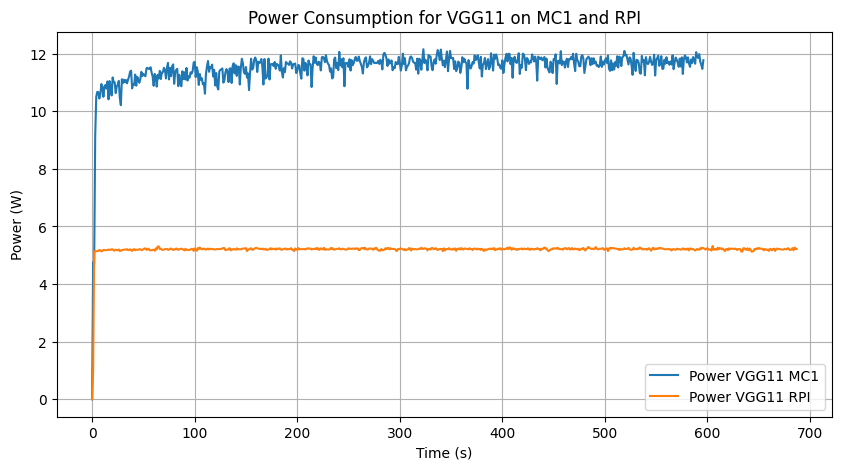

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
x_mc1= range(0, len(data_vgg11_mc1.index))
x_rpi= range(0, len(data_vgg11_rpi.index))
x_mbn= range(0, len(data_mbn_mc1.index))
ax.plot(x_mc1, data_vgg11_mc1['Power'], label='Power VGG11 MC1')
ax.plot(x_rpi, data_vgg11_rpi['Power'], label='Power VGG11 RPI')
ax.set_ylabel('Power (W)')
ax.set_xlabel('Time (s)')
ax.legend()
ax.grid()
plt.title('Power Consumption for VGG11 on MC1 and RPI')
plt.show()


In [22]:
# Calculate the total power consumption in Joules for VGG11 on MC1
total_power_mc1 = data_vgg11_mc1['Power'].sum()
total_power_mc1 = total_power_mc1
print("Total power consumption for VGG11 on MC1: ", total_power_mc1, "J")

# Calculate the total power consumption in Joules for VGG11 on RPI
total_power_rpi = data_vgg11_rpi['Power'].sum()
total_power_rpi = total_power_rpi
print("Total power consumption for VGG11 on RPI: ", total_power_rpi, "J")

# Calculate the total power consumption in Joules for VGG16 on MC1
total_power_mc1 = data_vgg16_mc1['Power'].sum()
total_power_mc1 = total_power_mc1
print("Total power consumption for VGG16 on MC1: ", total_power_mc1, "J")

# Calculate the total power consumption in Joules for VGG16 on RPI
total_power_rpi = data_vgg16_rpi['Power'].sum()
total_power_rpi = total_power_rpi
print("Total power consumption for VGG16 on RPI: ", total_power_rpi, "J")

# Calculate the total power consumption in Joules for MobileNet on MC1
total_power_mc1 = data_mbn_mc1['Power'].sum()
total_power_mc1 = total_power_mc1
print("Total power consumption for MobileNet on MC1: ", total_power_mc1, "J")

# Calculate the total power consumption in Joules for MobileNet on RPI
total_power_rpi = data_mbn_rpi['Power'].sum()
total_power_rpi = total_power_rpi
print("Total power consumption for MobileNet on RPI: ", total_power_rpi, "J")




Total power consumption for VGG11 on MC1:  6872.17565 J
Total power consumption for VGG11 on RPI:  3577.1884 J
Total power consumption for VGG16 on MC1:  12138.57735 J
Total power consumption for VGG16 on RPI:  6376.5342 J
Total power consumption for MobileNet on MC1:  4395.269249999999 J
Total power consumption for MobileNet on RPI:  1538.25835 J


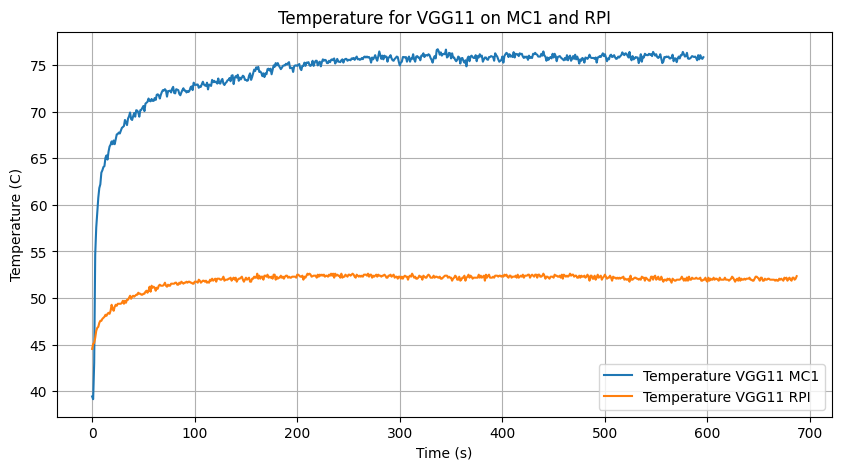

In [23]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(x_mc1, data_vgg11_mc1['Temperature'], label='Temperature VGG11 MC1')
ax.plot(x_rpi, data_vgg11_rpi['Temperature'], label='Temperature VGG11 RPI')
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Time (s)')
ax.legend()
ax.grid()
plt.title('Temperature for VGG11 on MC1 and RPI')
plt.show()